# Spectrum analysis with GUI

In [2]:
import pynmr
import pynmr.model.parser.topSpin as T
import pynmr.model.processor as P
import pynmr.model.operations as O

import matplotlib.pyplot as plt
import numpy as np

import dill

%load_ext autoreload
%autoreload 2

c:\Users\Constantin\anaconda3\Lib\site-packages\paramiko\pkey.py:82: CryptographyDeprecationWarning: TripleDES has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.TripleDES and will be removed from this module in 48.0.0.
  "cipher": algorithms.TripleDES,
c:\Users\Constantin\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.Blowfish and will be removed from this module in 45.0.0.
  "class": algorithms.Blowfish,
c:\Users\Constantin\anaconda3\Lib\site-packages\paramiko\transport.py:243: CryptographyDeprecationWarning: TripleDES has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.TripleDES and will be removed from this module in 48.0.0.
  "class": algorithms.TripleDES,


In [3]:

path = "./data/bruker/dnp_210316_1_solids/1/"
IntRegio = "Int"
BslRegio = "Bsl"
data = T.TopSpin(path)




Directory:  ./data/bruker/dnp_210316_1_solids/1
Reading acqus file:  <_io.TextIOWrapper name='./data/bruker/dnp_210316_1_solids/1/acqus' mode='r' encoding='utf-8'>


In [ ]:
from pynmr.viewer import gui as mygui
from PyQt5 import QtWidgets as qtw
%gui qt5
m = mygui.MainWindow(arg = [])
m.domain = "Frequency.ppm"
m.openinDoc(data,path,TD1_index=0)
m.domainBox.setCurrentText(m.domain)
m.show()
m.updateView()

In [ ]:

pathToProcessor = path + "pynmrProcessor.pickle"
Processor = dill.load(open(pathToProcessor, "rb"))

Processor[0].runStack(data)

SetScale = O.SetPPMScale()
SetScale.run(data)

In [21]:
pathToRegions = path + "pynmrRegionStack.dill"
RegionStack = dill.load(open(pathToRegions, "rb"))
print(str(RegionStack.regionSets))
IntRegions = None
BslRegions = None
try:
    IntRegions = RegionStack.regionSets[IntRegio].regions
except Exception as e:
    print("No IntRegion found")
try:
    BslRegions = RegionStack.regionSets[BslRegio].regions
except Exception as e:
    print("No BslRegion found")
print("IntRegion: ", IntRegions)
print("BslRegion: ", BslRegions)
print("RegionStack: ", RegionStack)

{'Int': <pynmr.model.region.RegionSet object at 0x000002A0D01C99D0>, 'Bsl': <pynmr.model.region.RegionSet object at 0x000002A0D01C5B50>}
IntRegion:  [[-4207.460792091845, -1813.0153944481062]]
BslRegion:  [[-9000.0, -5000.0], [-1000.0, 4000.0]]
RegionStack:  <pynmr.model.region.RegionStack object at 0x000002A0D01C9C70>


In [25]:
Bsl = O.BaseLineCorrection(BslRegions,3,scale= "ppm")
Bsl.run(data)

Int = O.GetSingleIntegral(0,int(IntRegions[0][0]),int(IntRegions[0][1]),scale= "ppm")
Integral = Int.run(data)


BaselineCorrection done.


Integral:  97530541.87750967


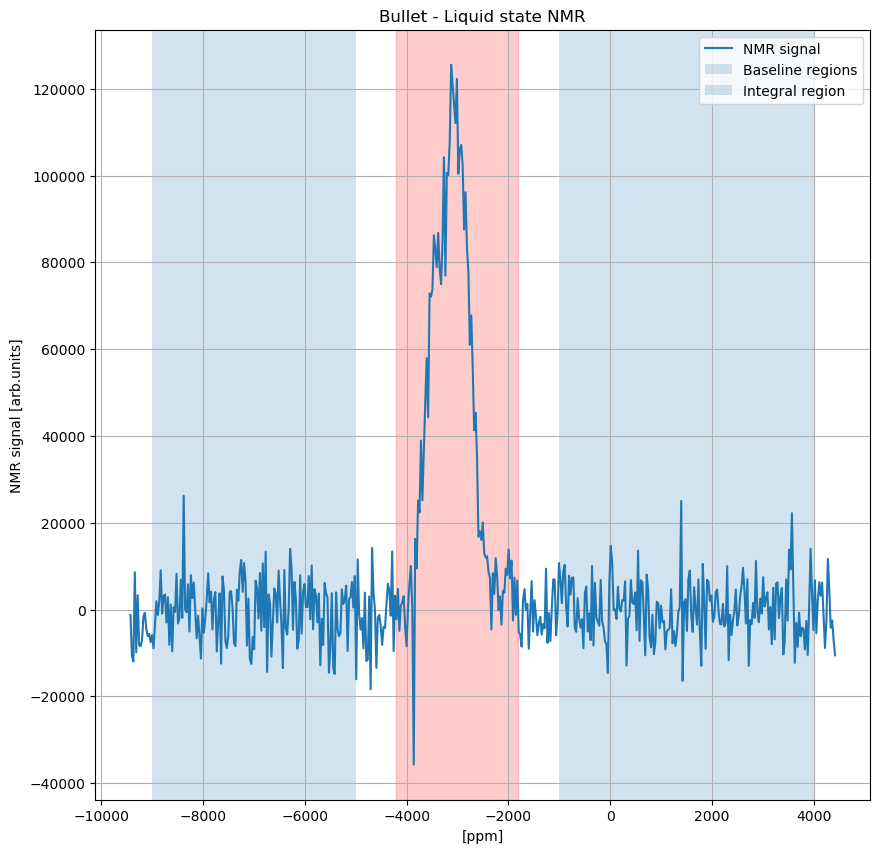

In [32]:
print("Integral: ", Integral)

plt.figure(figsize=(10,10))

plt.plot(data.ppmScale,data.RSPEC(-1,0))

plt.axvspan(BslRegions[0][0],BslRegions[0][1], alpha=0.2,label='Baseline regions')
plt.axvspan(BslRegions[1][0],BslRegions[1][1], alpha=0.2, label='Baseline regions')
plt.axvspan(IntRegions[0][0], IntRegions[0][1], alpha=0.2, color='red',label='Integral region')

plt.title("Bullet - Liquid state NMR")
plt.xlabel("[ppm]")
plt.ylabel("NMR signal [arb.units]")
plt.legend(["NMR signal", "Baseline regions", "Integral region"])
plt.grid()